Shape of inputs =  (784, 1000)
Shape of labels =  (10, 1000)
One-hot encoded label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Final Loss =  0.10633167374741996
Final Accuracy =  0.903
Final Test Loss = 0.1751305743637872
Final Test Accuracy = 0.792


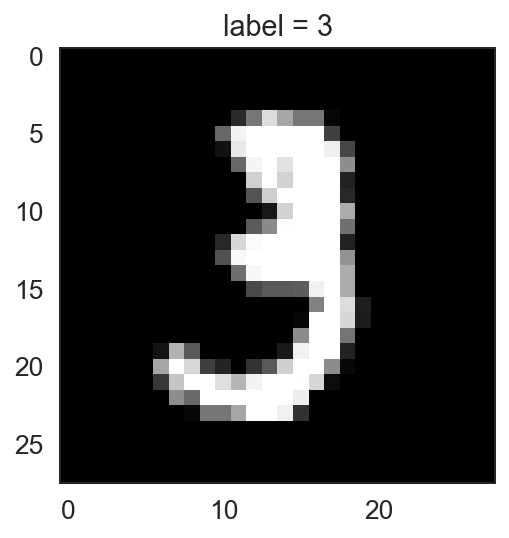

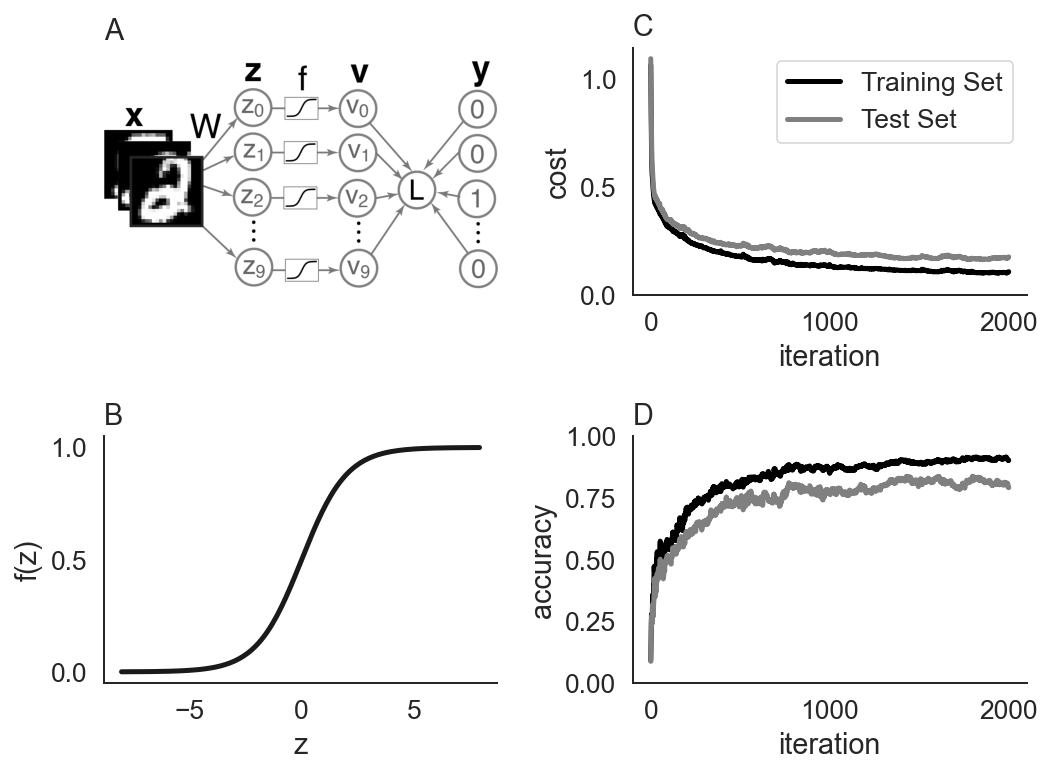

In [44]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')
%config InlineBackend.figure_format = 'retina'


# Keep this set to false unless you want to save figures and data
# (in which case you'll need to change some directories below)
SaveFigures=False
###############################################
###############################################

# For computing runtimes
from time import time as tm

# Seed random number generator so that
# we get the same results every time
# we run this code
np.random.seed(6)

# Learning rate
epsilon=.01

# Number of grad descent iterations
#NumIterations=300


# Load the data from a file
if 'google.colab' in str(get_ipython()):
    url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/DataFiles/MNISTdata.npz"
    file = np.DataSource().open(url)
    data = np.load(file.name, allow_pickle=True)
else:
    data = np.load('./DataFiles/MNISTdata.npz', allow_pickle=True)


X=data['X']
Y=data['Y']
XTest=data['XTest']
YTest=data['YTest']

# Pre-process data. This is not necessary, 
# but it can improve learning. 
X=(X-X.mean())/X.std()
XTest=(XTest-XTest.mean())/XTest.std()


print('Shape of inputs = ',X.shape)
print('Shape of labels = ',Y.shape)

# Display an image from the data set
i=10
plt.figure()
plt.imshow(X[:,i].reshape(28,28),cmap='gray')  
plt.title('label = %d'%np.argmax(Y[:,i]))
print('One-hot encoded label:',Y[:,i])


# Initialize W
W=np.random.randn(10,28*28)/np.sqrt(28*28*10)


# Import logistic sigmoid activation function
from scipy.special import expit as LogisticSigmoid

def f(x):
    return LogisticSigmoid(x)

# Derivative of logistic sigmoid
def fprime(x):
    return f(x)*(1-f(x))


# Get the size of the data set
m=np.shape(X)[1]
NumEpochs=2
NumIterations=NumEpochs*m

# Initialize vectors of losses and accuracies
TrainLoss=np.zeros(NumIterations)
TrainAccuracy=np.zeros(NumIterations)
TestLoss=np.zeros(NumIterations)
TestAccuracy=np.zeros(NumIterations)


# Get the actua digits from the one-hot encoded labels
ActualDigits=np.argmax(Y,axis=0)
TestActualDigits=np.argmax(YTest,axis=0)



for k in range(NumEpochs):
    for i in range(m):        
        z=W@X[:,i] 
        v=f(z)     
        DeltaW=-epsilon*np.outer((v-Y[:,i])*fprime(z),X[:,i])
        W=W+DeltaW 

        # Compute percent correct on entire training set
        # using current value of W
        V=f(W@X)
        TrainLoss[i+m*k]=(1/2)*np.mean(np.sum((V-Y)**2,axis=0))    
        TrainGuesses=np.argmax(V,axis=0)
        TrainCorrect=(TrainGuesses==ActualDigits)
        TrainAccuracy[i+m*k]=np.mean(TrainCorrect)

        # Now do test set
        VTest=f(W@XTest)
        TestLoss[i+m*k]=(1/2)*np.mean(np.sum((VTest-YTest)**2,axis=0))    
        TestGuesses=np.argmax(VTest,axis=0)
        TestCorrect=(TestGuesses==TestActualDigits)
        TestAccuracy[i+m*k]=np.mean(TestCorrect)

    
print('Final Loss = ',TrainLoss[-1])
print('Final Accuracy = ',TrainAccuracy[-1])
print('Final Test Loss =',TestLoss[-1])
print('Final Test Accuracy =',TestAccuracy[-1])    
    

# Make figure
plt.subplots(figsize=(9*.85,6.6*.85))

plt.subplot(2,2,1)
# Get image for plot
if 'google.colab' in str(get_ipython()):
    url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/ImageFiles/PerceptronDiagram.png"
    file = np.DataSource().open(url)
    im = plt.imread(file.name)
else:
    im = plt.imread('./ImageFiles/PerceptronDiagram.png')
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('A',loc='left')
sns.despine()

plt.subplot(2,2,3)
zplot=np.arange(-8,8,.1)
plt.plot(zplot,f(zplot),'k')
plt.ylabel('f(z)')
plt.xlabel('z')
plt.title('B',loc='left')
sns.despine()


plt.subplot(2,2,2)
plt.plot(TrainLoss,color='black',label='Training Set')
plt.plot(TestLoss,color='gray',label='Test Set')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend()
plt.ylim(bottom=0)
plt.title('C',loc='left')
sns.despine()


plt.subplot(2,2,4)
plt.plot(TrainAccuracy,color='black')
plt.plot(TestAccuracy,color='gray')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.title('D',loc='left')
sns.despine()

plt.tight_layout()


# Save figure if needed
if SaveFigures:
      plt.savefig('../Figures/Perceptron.pdf')

        
        


In [45]:

# plt.figure(figsize=(2.2,2))
# zplot=np.arange(-8,8,.1)
# plt.plot(zplot,f(zplot),'r')
# plt.yticks([])
# plt.xticks([])
# #plt.ylabel('f(z)')
# #plt.xlabel('z')
# sns.despine()

# plt.tight_layout()

# # Save figure if needed
# if SaveFigures:
#     plt.savefig('../Scratch/LogisticSigmoidPlot.eps')
#     plt.savefig('../Scratch/LogisticSigmoidPlot.pdf')

        

In [ ]:
# THIS CODE USES FULL BATCH UPDATES

# ###############################################
# ## Import packages and specify some settings ##
# ###############################################
# # Import packages
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # This makes plots show up and look nice
# %matplotlib inline
# sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
# sns.set_palette('muted')

# # Keep this set to false unless you want to save figures and data
# # (in which case you'll need to change some directories below)
# SaveFigures=True
# ###############################################
# ###############################################

# # For computing runtimes
# from time import time as tm

# # Seed random number generator so that
# # we get the same results every time
# # we run this code
# np.random.seed(6)

# # Learning rate
# epsilon=.1

# # Number of grad descent iterations
# NumIterations=300


# # Load the data from a file
# if 'google.colab' in str(get_ipython()):
#     url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/MNISTdata.npz"
#     file = np.DataSource().open(url)
#     data = np.load(file.name, allow_pickle=True)
# else:
#     data = np.load('./MNISTdata.npz', allow_pickle=True)


# X=data['X']
# Y=data['Y']
# XTest=data['XTest']
# YTest=data['YTest']

# X=X
# XTest=XTest

# print('Shape of inputs = ',X.shape)
# print('Shape of labels = ',Y.shape)

# # Display an image from the data set
# i=10
# plt.figure()
# plt.imshow(X[:,i].reshape(28,28),cmap='gray')  
# plt.title('label = %d'%np.argmax(Y[:,i]))
# print('One-hot encoded label:',Y[:,i])


# # Initialize W
# W=np.random.randn(10,28*28)/np.sqrt(28*28*10)


# # Import logistic sigmoid activation function
# from scipy.special import expit as LogisticSigmoid

# def f(x):
#     return LogisticSigmoid(x)

# # Derivative of logistic sigmoid
# def fprime(x):
#     return f(x)*(1-f(x))


# # Initialize vector of losses
# Loss=np.zeros(NumIterations)
# Accuracy=np.zeros(NumIterations)
# TestLoss=np.zeros(NumIterations)
# TestAccuracy=np.zeros(NumIterations)

# # Get the size of the data set
# m=np.shape(X)[1]

# # Get the actua digits from the one-hot encoded labels
# ActualDigits=np.argmax(Y,axis=0)
# TestActualDigits=np.argmax(YTest,axis=0)

# for j in range(NumIterations):    
#     Z=W@X
#     V=f(Z)
#     Loss[j]=(1/2)*np.mean(np.sum((V-Y)**2,axis=0))    
#     DeltaW=-(epsilon/m)*((V-Y)*fprime(Z))@(X.T)
#     W=W+DeltaW

#     Guesses=np.argmax(V,axis=0)
#     Correct=(Guesses==ActualDigits)
#     Accuracy[j]=np.mean(Correct)
    
#     VTest=f(W@XTest)
#     TestLoss[j]=(1/2)*np.mean(np.sum((VTest-YTest)**2,axis=0))    
#     TestGuesses=np.argmax(VTest,axis=0)
#     TestCorrect=(TestGuesses==TestActualDigits)
#     TestAccuracy[j]=np.mean(TestCorrect)

    
# print('Final Loss = ',Loss[-1])
# print('Final Accuracy = ',Accuracy[-1])
# print('Final Test Loss =',TestLoss[-1])
# print('Final Test Accuracy =',TestAccuracy[-1])    
    

    
# # Make figure
# plt.subplots(figsize=(9*.8,6.5*.8))

# plt.subplot(2,2,1)
# # Get image for plot
# if 'google.colab' in str(get_ipython()):
#     url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/ImageFiles/PerceptronDiagram.png"
#     file = np.DataSource().open(url)
#     im = plt.imread(file.name)
# else:
#     im = plt.imread('./ImageFiles/PerceptronDiagram.png')
# plt.imshow(im,interpolation='hanning')
# plt.axis('off')
# plt.title('A',loc='left')
# sns.despine()

# plt.subplot(2,2,3)
# zplot=np.arange(-8,8,.1)
# plt.plot(zplot,f(zplot),'k')
# plt.ylabel('f(z)')
# plt.xlabel('z')
# plt.title('B',loc='left')
# sns.despine()


# plt.subplot(2,2,2)
# plt.plot(Loss,color='black',label='Training Set')
# plt.plot(TestLoss,color='gray',label='Test Set')
# plt.xlabel('iteration')
# plt.ylabel('cost')
# plt.legend()
# plt.title('C',loc='left')
# sns.despine()


# plt.subplot(2,2,4)
# plt.plot(Accuracy,color='black')
# plt.plot(TestAccuracy,color='gray')
# plt.xlabel('iteration')
# plt.ylabel('accuracy')
# plt.title('D',loc='left')
# sns.despine()

# plt.tight_layout()


# # Save figure if needed
# if SaveFigures:
#       plt.savefig('../Figures/Perceptron.pdf')

        
